# Dependency usage

This notebook shows the distribution of dependencies by version

_Note: If you have opened this notebook from Moderne, the data table is already loaded locally as `./dependency-usage-violin.xlsx`._

In [155]:
data_table_file = "./dependency-usage.xlsx"

In [ ]:
import piplite

await piplite.install('pandas')
await piplite.install('openpyxl')

In [156]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_excel(data_table_file,engine="openpyxl")

In [157]:
df_by_gav = df[['version', 'groupId', 'artifactId']].groupby(by = ['version', 'groupId', 'artifactId'])['version'].count().sort_values(ascending=False).reset_index(name='count')
df_by_gav['groupArtifact'] = df_by_gav[['groupId','artifactId']].apply(':\n'.join, axis=1)
df_by_gav = df_by_gav.drop(columns=['groupId', 'artifactId'])
df_by_gav = df_by_gav.set_index(['groupArtifact','version'], drop = True).sort_values(by = 'version').unstack('version').head(30)

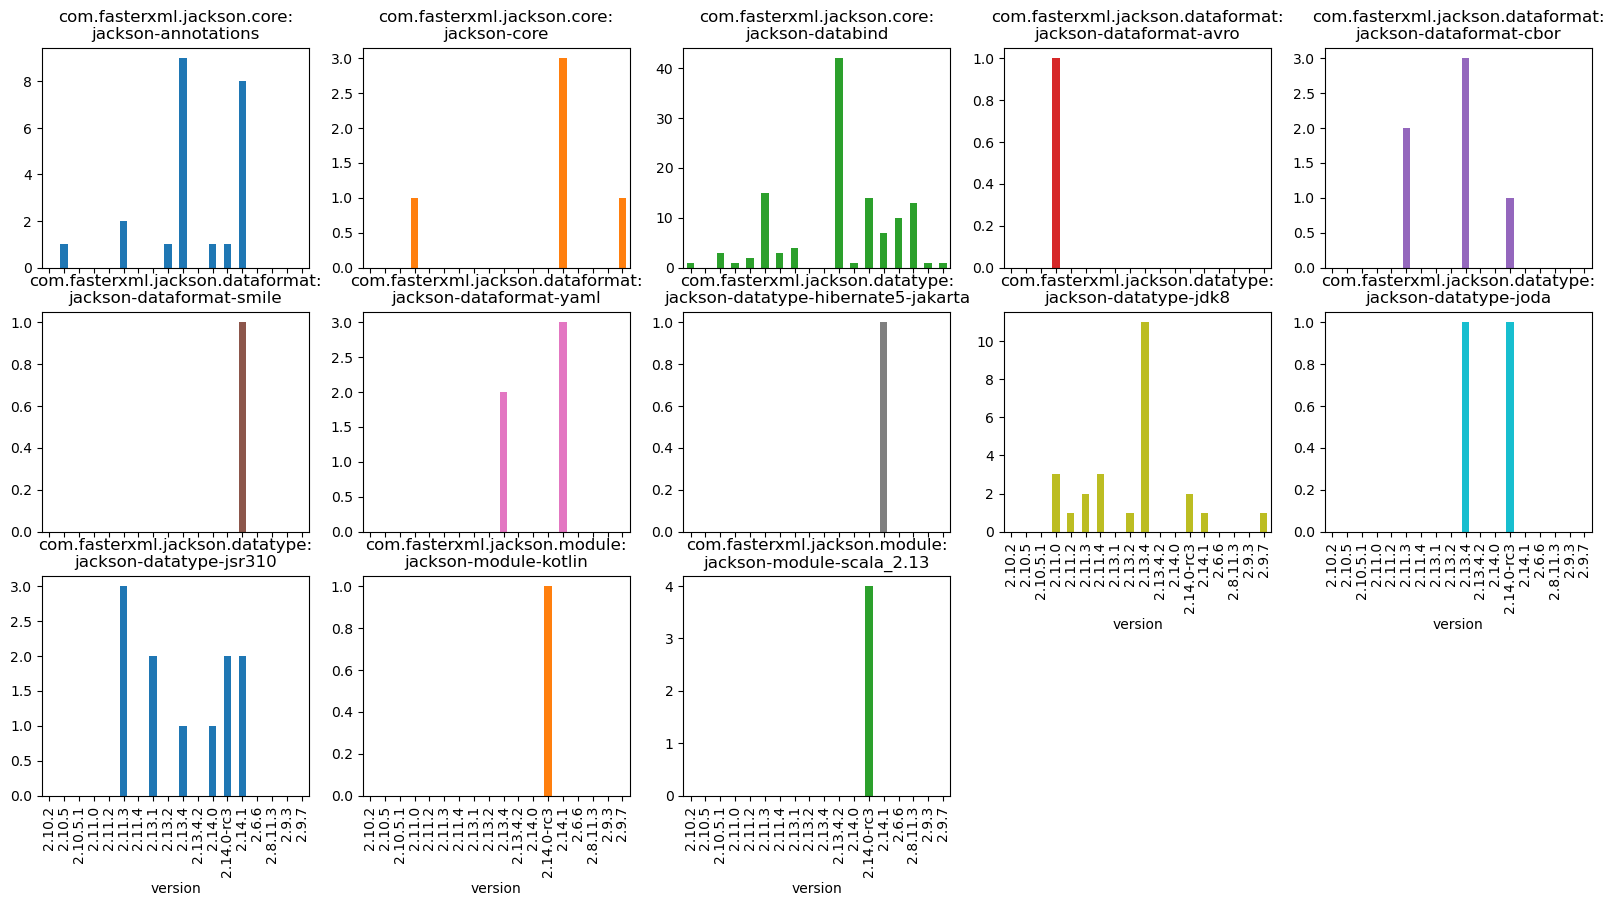

In [158]:
plot = df_by_gav.T.droplevel(0).plot.bar(subplots=True, figsize=(20, 20), layout=(6,5), legend=False)